In [1]:
import pandas as pd
# gbq import
from pandas.io import gbq
import matplotlib.pyplot as plt

import matplotlib
matplotlib.rcParams['font.family'] ='AppleGothic'
matplotlib.rcParams['axes.unicode_minus'] =False

In [ ]:
#https://colorswall.com/palette/92380
#60b68d
#0c9c3c
#05e87b

#d9ead3ff

# 따릉이

In [332]:
# SQL을 사용하여 프로젝트에서 데이터를 조회 후 pandas dataframe에 입력

sql = 'select * from bkms-project-3.data.bike limit 10;'
project_id = "bkms-project-3"

bike = pd.read_gbq(sql, project_id=project_id, dialect='standard')
bike

bikeid                  renttime  year  month  day dayofweek  hour  \
0  SPB-47616 2022-04-01 15:58:23+00:00  2022      4    1    Friday    15   
1  SPB-52874 2022-04-01 12:20:15+00:00  2022      4    1    Friday    12   
2  SPB-46594 2022-04-01 07:28:33+00:00  2022      4    1    Friday     7   
3  SPB-34823 2022-04-01 12:28:55+00:00  2022      4    1    Friday    12   
4  SPB-50214 2022-04-01 13:42:00+00:00  2022      4    1    Friday    13   
5  SPB-43680 2021-10-01 07:48:14+00:00  2021     10    1    Friday     7   
6  SPB-50391 2021-10-01 05:20:09+00:00  2021     10    1    Friday     5   
7  SPB-54082 2021-10-01 14:42:29+00:00  2021     10    1    Friday    14   
8  SPB-46090 2021-10-01 18:08:17+00:00  2021     10    1    Friday    18   
9  SPB-44788 2021-10-01 12:32:08+00:00  2021     10    1    Friday    12   

   rentfromid         rentfromname                renttotime  renttoid  \
0        1268         몽촌토성역 1번출구 옆 2022-04-01 17:04:53+00:00      1268   
1        1354           고려대학교 2번출구 2022-04-01 12:31:04+00:00      1323   
2        1421             신내역 4번출구 2022-04-01 07:34:32+00:00      4821   
3        1442  명칭변경(중랑구 중소기업 창업센터) 2022-04-01 12:31:34+00:00      1474   
4        1442  명칭변경(중랑구 중소기업 창업센터) 2022-04-01 17:51:43+00:00      1442   
5         367          독립문역 3-1번출구 2021-10-01 08:09:58+00:00      3412   
6         395           경희궁 자이 2단지 2021-10-01 05:28:27+00:00       391   
7         412        DMC산학협력연구센터 앞 2021-10-01 14:50:52+00:00       492   
8         417          DMC역 2번출구 옆 2021-10-01 18:19:45+00:00       912   
9         454    종로2가 버스정류장 (종각방향) 2021-10-01 12:38:13+00:00       326   

            renttoname  usetime  usedistance  
0         몽촌토성역 1번출구 옆     66.0      6970.00  
1          월곡역 입구 육교 밑     10.0      1160.00  
2          동원초등학교 정문 앞      5.0      1000.00  
3              서울중랑우체국      2.0       327.31  
4  명칭변경(중랑구 중소기업 창업센터)    249.0      3244.16  
5                 세운상가     21.0      3782.74  
6                정동길입구      8.0      1020.00  
7           성산시영아파트 후문      8.0      1460.00  
8                응암오거리     11.0       380.00  
9           안국역 5번출구 앞      6.0       843.43

# 1. usedistance 기준

서울시 공공자전거 대여이력 정보 - 전처리 전

In [2]:
# SQL을 사용하여 프로젝트에서 데이터를 조회 후 pandas dataframe에 입력

sql = 'select case when usedistance < 20000 then (DIV(CAST(usedistance as NUMERIC),100)+1) else 201 end as dist, count(*) as cnt from bkms-project-3.data.bike group by dist'
project_id = "bkms-project-3"

df2 = pd.read_gbq(sql, project_id=project_id, dialect='standard')
df2

dist      cnt
0     13.000000000  1095561
1     14.000000000  1022858
2     12.000000000  1143758
3     22.000000000   587947
4      8.000000000  1344897
..             ...      ...
196  153.000000000    10709
197  165.000000000     8451
198  181.000000000     6145
199  157.000000000    10073
200  183.000000000     5940

[201 rows x 2 columns]

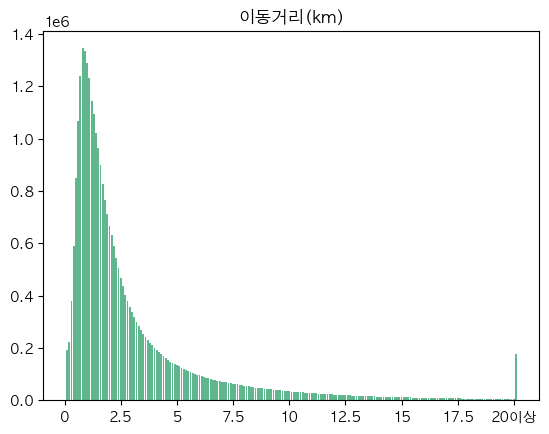

In [3]:
plt.bar(df2['dist'],df2['cnt'],color='#60b68d')
plt.title('이동거리(km)')
plt.xticks([0,25,50,75,100,125,150,175,200], labels = ['0','2.5','5','7.5','10','12.5','15','17.5','20이상'])
plt.show()

# 2. usetime 기준

In [4]:
# SQL을 사용하여 프로젝트에서 데이터를 조회 후 pandas dataframe에 입력

sql = 'select case when usetime <0 then 0 else 1 end as time , count(*) as cnt from bkms-project-3.data.bike group by time'
project_id = "bkms-project-3"

less0 = pd.read_gbq(sql, project_id=project_id, dialect='standard')
less0

time       cnt
0     0        45
1     1  31572708

In [5]:
less0.sort_values(by='time')

time       cnt
0     0        45
1     1  31572708

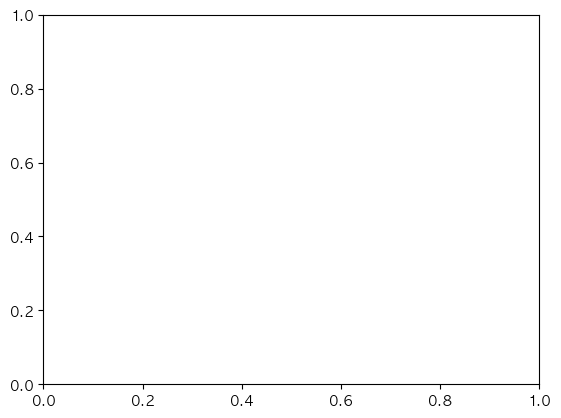

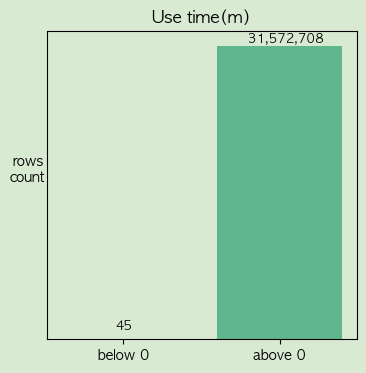

In [9]:
fig, ax = plt.subplots(nrows=1, ncols=1)
fig = plt.figure(figsize=(4, 4))
ax = fig.add_subplot(1, 1, 1)
ax.set_facecolor('#d9ead3ff')

fig.patch.set_facecolor('#d9ead3ff')

plt.bar(less0['time'],less0['cnt'],color='#60b68d')
plt.title('Use time(m)')

plt.xticks([0,1], labels = ['below 0','above 0'])

plt.yticks([])
plt.ylabel('rows\ncount',rotation=0, labelpad=10)
#plt.ylabel(None)
#current_values = plt.gca().get_yticks()
#plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values])

#fig.bar_label(fig.containers[1], label_type='edge')
plt.annotate(format(less0.iloc[0,1], ','),(-0.05,1000000),fontsize=9)
plt.annotate(format(less0.iloc[1,1], ','),(0.8,31900000),fontsize=9)

#fig.get_legend().remove()
plt.show()

In [128]:
# SQL을 사용하여 프로젝트에서 데이터를 조회 후 pandas dataframe에 입력

sql = 'select usedistance, count(*) as cnt from bkms-project-3.data.bike where usetime = 0 group by usedistance'
project_id = "bkms-project-3"

time0 = pd.read_gbq(sql, project_id=project_id, dialect='standard')
time0

usedistance  cnt
0          88.20   21
1         260.00   23
2         140.00  171
3          70.00  111
4          60.00  118
..           ...  ...
317      2159.71    1
318     10630.00    1
319     12620.00    1
320       142.03    1
321       820.00    1

[322 rows x 2 columns]

Text(0.5, 1.0, '이동시간 0분의 이동거리(m)')

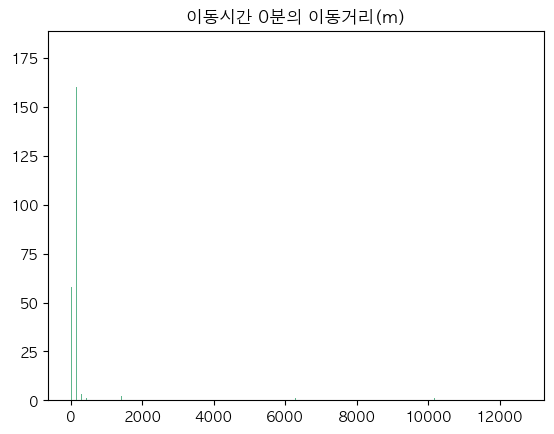

In [134]:
plt.bar(time0['usedistance'],time0['cnt'],color='#60b68d')
plt.title('이동시간 0분의 이동거리(m)')

Text(0.5, 1.0, '이동시간 0분의 이동거리(m)')

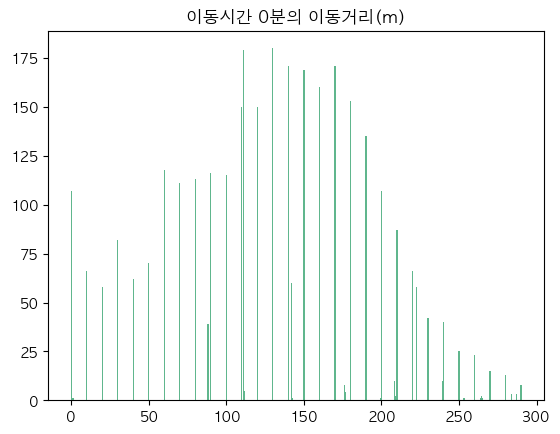

In [136]:
sample = time0[time0['usedistance']<300]
plt.bar(sample['usedistance'],sample['cnt'],color='#60b68d')
plt.title('이동시간 0분의 이동거리(m)')

## 분당 이동거리

In [258]:
# SQL을 사용하여 프로젝트에서 데이터를 조회 후 pandas dataframe에 입력

sql = 'select DIV(CAST(usedistance as NUMERIC),CAST((case when usetime <= 0 then 1 else usetime end)as NUMERIC)) as distpermin, count(*) as cnt from bkms-project-3.data.bikenew group by distpermin;'
project_id = "bkms-project-3"

distpermin = pd.read_gbq(sql, project_id=project_id, dialect='standard')
distpermin

distpermin    cnt
0         3.000000000  12759
1       121.000000000  90719
2       242.000000000  15821
3        51.000000000  30110
4        45.000000000  30230
...               ...    ...
1265   1264.000000000      1
1266  15768.000000000      1
1267   1685.000000000      1
1268   2671.000000000      1
1269    731.000000000      1

[1270 rows x 2 columns]

In [272]:
distpermin_sort = distpermin.sort_values(by='cnt',ascending=False)
min(distpermin_sort.loc[distpermin_sort['cnt']<2,'distpermin'])

Decimal('721.000000000')

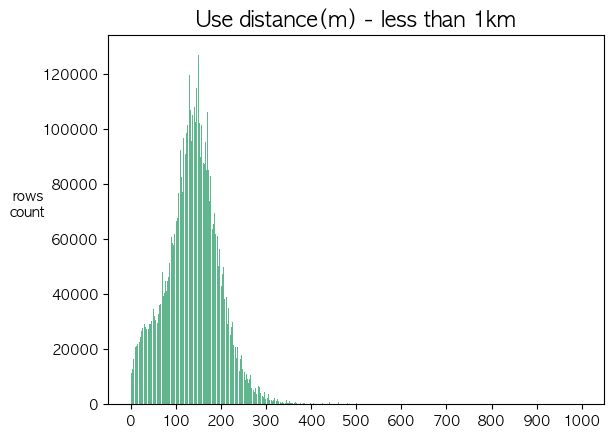

In [807]:
dispermin_plot = distpermin[distpermin['distpermin']<=1000]
plt.bar(dispermin_plot['distpermin'],dispermin_plot['cnt'],color='#60b68d')
plt.title('Use distance(m) - less than 1km', fontsize=15)
plt.ylabel('rows\ncount', rotation=0, labelpad=10)
plt.xticks([0,100,200,300,400,500,600,700,800,900,1000], labels = [0,100,200,300,400,500,600,700,800,900,1000])
plt.show()

In [283]:
distpermin.loc[distpermin['distpermin']<=300,'type'] = 0
distpermin.loc[distpermin['distpermin']>300,'type'] = 1

In [294]:
pd.DataFrame(distpermin.groupby(['type'])['cnt'].sum()).reset_index()

type       cnt
0   0.0  13767751
1   1.0    134328

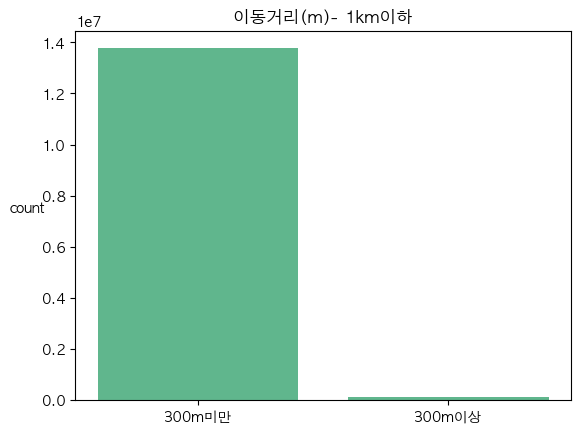

In [296]:
dispermin_plot = pd.DataFrame(distpermin.groupby(['type'])['cnt'].sum()).reset_index()
plt.bar(dispermin_plot['type'],dispermin_plot['cnt'],color='#60b68d')
plt.title('이동거리(m)- 1km이하')
plt.ylabel('count', rotation=0, labelpad=10)
plt.xticks([0,1], labels = ['300m미만','300m이상'])
plt.show()

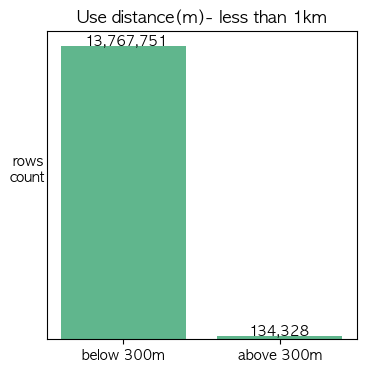

In [808]:
dispermin_plot = pd.DataFrame(distpermin.groupby(['type'])['cnt'].sum()).reset_index()

plt.figure(figsize=(4, 4))

plt.bar(dispermin_plot['type'],dispermin_plot['cnt'],color='#60b68d')
plt.title('Use distance(m)- less than 1km')

plt.xticks([0,1], labels = ['below 300m','above 300m'])

plt.yticks([])
plt.ylabel('rows\ncount',rotation=0, labelpad=10)

#fig.bar_label(fig.containers[1], label_type='edge')
plt.annotate(format(dispermin_plot.iloc[0,1], ','),(-0.25,13767751),fontsize=10)
plt.annotate(format(dispermin_plot.iloc[1,1], ','),(0.8,134328),fontsize=10)

#fig.get_legend().remove()
plt.show()

# 기상 데이터

## 최종 dataset

In [256]:
# SQL을 사용하여 프로젝트에서 데이터를 조회 후 pandas dataframe에 입력

sql = 'select * from bkms-project-3.data.model_dataset limit 10'
project_id = "bkms-project-3"

model_dataset = pd.read_gbq(sql, project_id=project_id, dialect='standard')
model_dataset.columns = ['y_label', 'id', 'month', 'day', 'dayofweek', 'hour', 'holiday',
       'nearsub', 'river', 'worker_cnt', 'temp', 'prep', 'humid', 'windspeed',
       'dust']
model_dataset

y_label   id  month  day dayofweek  hour  holiday  nearsub  river  \
0       -2  102      1    1  Saturday     9        1        1      0   
1       -1  102      1    1  Saturday    11        1        1      0   
2       -4  102      1    1  Saturday    12        1        1      0   
3        0  102      1    1  Saturday    13        1        1      0   
4        0  102      1    1  Saturday    14        1        1      0   
5        3  102      1    1  Saturday    15        1        1      0   
6        6  102      1    1  Saturday    16        1        1      0   
7        1  102      1    1  Saturday    17        1        1      0   
8       -1  102      1    1  Saturday    18        1        1      0   
9        0  102      1    1  Saturday    19        1        1      0   

   worker_cnt  temp  prep  humid  windspeed  dust  
0       61995  -9.1   0.0     56        2.1     1  
1       61995  -4.3   0.0     37        0.9     1  
2       61995  -2.3   0.0     34        1.2     1  
3       61995  -0.1   0.0     32        1.5     1  
4       61995   1.3   0.0     32        2.2     2  
5       61995   1.9   0.0     35        1.7     2  
6       61995   1.8   0.0     37        1.4     1  
7       61995   0.5   0.0     38        1.5     2  
8       61995  -0.9   0.0     42        0.7     2  
9       61995  -1.2   0.0     45        0.9     2

# EDA

In [907]:
# SQL을 사용하여 프로젝트에서 데이터를 조회 후 pandas dataframe에 입력

sql = 'select year,month,day, count(*) as cnt from bkms-project-3.data.bike group by year,month,day'
project_id = "bkms-project-3"

eda = pd.read_gbq(sql, project_id=project_id, dialect='standard')
eda

year  month  day     cnt
0    2022      3    1   44043
1    2022      2    1   12377
2    2022      1    1   23392
3    2021      7    1  129655
4    2022      6    1  166510
..    ...    ...  ...     ...
360  2021     12   30   36585
361  2021     12   31   30718
362  2021      8   31   19635
363  2021      7   31   84425
364  2022      3   31   96176

[365 rows x 4 columns]

In [908]:
eda_plot = eda.sort_values(by=['year','month','day'])
eda_plot['datetime'] = pd.to_datetime(eda_plot[['year', 'month', 'day']]) #datetime하려면 컬럼이름이 year,month,day,hour여야함.

In [909]:
eda_plot[(eda_plot['datetime']=='2022-06-30') | (eda_plot['datetime']=='2021-07-01')]

year  month  day     cnt   datetime
3    2021      7    1  129655 2021-07-01
178  2022      6   30    8459 2022-06-30

Text(0.5, 1.0, '2021.07~2022.06 따릉이 이용건수 추이')

/Users/ce/opt/anaconda3/envs/A2I/lib/python3.10/site-packages/IPython/core/events.py:89: UserWarning: Glyph 46384 (\N{HANGUL SYLLABLE DDA}) missing from current font.
  func(*args, **kwargs)
/Users/ce/opt/anaconda3/envs/A2I/lib/python3.10/site-packages/IPython/core/events.py:89: UserWarning: Glyph 47497 (\N{HANGUL SYLLABLE REUNG}) missing from current font.
  func(*args, **kwargs)
/Users/ce/opt/anaconda3/envs/A2I/lib/python3.10/site-packages/IPython/core/events.py:89: UserWarning: Glyph 51060 (\N{HANGUL SYLLABLE I}) missing from current font.
  func(*args, **kwargs)
/Users/ce/opt/anaconda3/envs/A2I/lib/python3.10/site-packages/IPython/core/events.py:89: UserWarning: Glyph 50857 (\N{HANGUL SYLLABLE YONG}) missing from current font.
  func(*args, **kwargs)
/Users/ce/opt/anaconda3/envs/A2I/lib/python3.10/site-packages/IPython/core/events.py:89: UserWarning: Glyph 44148 (\N{HANGUL SYLLABLE GEON}) missing from current font.
  func(*args, **kwargs)
/Users/ce/opt/anaconda3/envs/A2I/lib/python

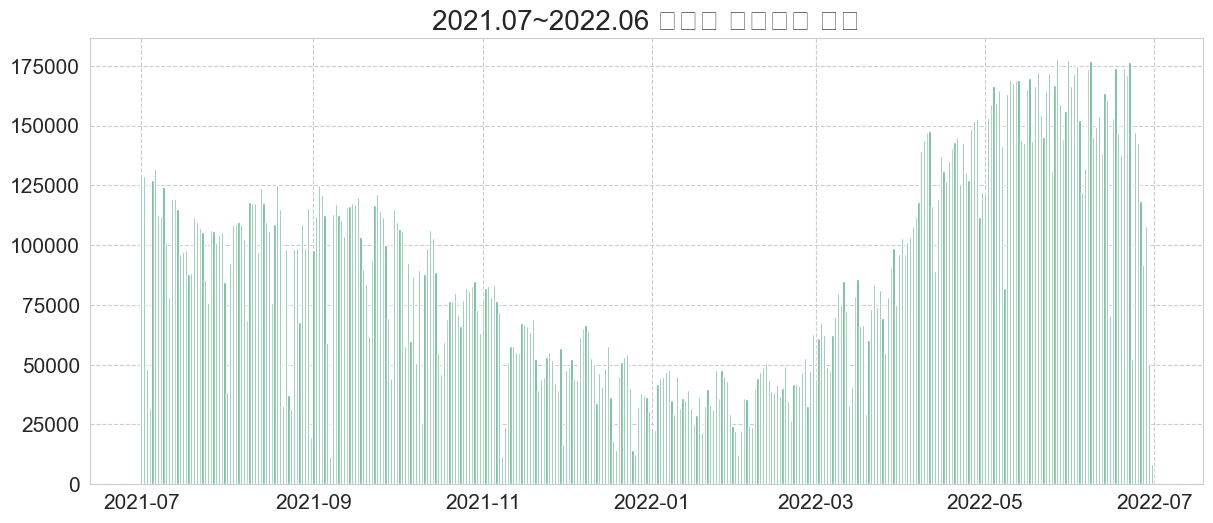

In [910]:
eda_plot = eda_plot[eda_plot['datetime']<'2022-07-01']

plt.figure(figsize=(12,5))
#plt.scatter(eda_plot['datetime'],eda_plot['cnt'],color='#60b68d')
#plt.plot(eda_plot['datetime'],eda_plot['cnt'],color='#60b68d')
plt.bar(eda_plot['datetime'],eda_plot['cnt'],color='#60b68d')

plt.subplots_adjust(wspace=0, hspace=0)
plt.tight_layout(h_pad=-1, w_pad=-1)

plt.xticks(fontsize=15)
#plt.xticks([0,100,200,300,400,500,600,700,800,900,1000], labels = [0,100,200,300,400,500,600,700,800,900,1000])
#plt.xticks(None)
plt.yticks(fontsize=15)
plt.title('2021.07~2022.06 따릉이 이용건수 추이',fontsize=20)

In [911]:
eda_plot.loc[(eda_plot['month']>=3)&(eda_plot['month']<=5) ,'season'] = 'Spring'
eda_plot.loc[(eda_plot['month']>=6)&(eda_plot['month']<=8),'season'] = 'Summer'
eda_plot.loc[(eda_plot['month']>=9)&(eda_plot['month']<=11),'season'] = 'Fall'
eda_plot.loc[(eda_plot['month']<=2)|(eda_plot['month']>11),'season'] = 'Winter'

In [912]:
a = eda_plot.groupby(by=['month','season'])['cnt'].sum().reset_index()
a['cnt'] = a['cnt'].astype(dtype='float')
a['month'] = a['month'].astype(dtype='float')

Text(0.5, 1.0, 'Rented Bike Count with respect of Season')

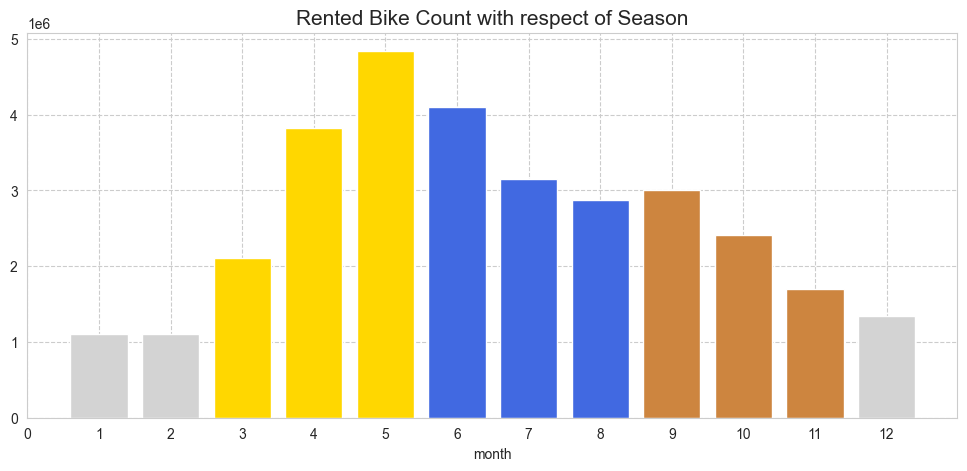

In [929]:
# Getting feel of week column with pointplot  
import seaborn as sns
#sns.set_style("whitegrid",{'grid.linestyle': '--'})
#plt.figure(figsize=(15,7))
#sns.barplot(x=a["month"].astype(int),y=a['cnt'],hue=a['season'])
#plt.title("Rented Bike Count during weekday and weekend with respect of Hour")


a['color'] = np.where(a.season == 'Spring', 'gold', np.where(a.season =='Summer', 'royalblue',
                                                             np.where(a.season =='Fall', 'peru', 'lightgray')))

plt.figure(figsize=(12,5))
#plt.scatter(a["month"],a['cnt'],color='#60b68d')
#plt.plot(eda_plot['datetime'],eda_plot['cnt'],color='#60b68d')
plt.bar(a["month"],a['cnt'],color=a['color'])

#plt.subplots_adjust(wspace=0, hspace=0)
#plt.tight_layout(h_pad=-1, w_pad=-1)

#plt.xticks(fontsize=15)
plt.xticks([0,1,2,3,4,5,6,7,8,9,10,11,12], labels = [0,1,2,3,4,5,6,7,8,9,10,11,12])
#plt.xticks(None)
#plt.yticks(fontsize=15)
plt.xlabel('month')
plt.title('Rented Bike Count with respect of Season',fontsize=15)

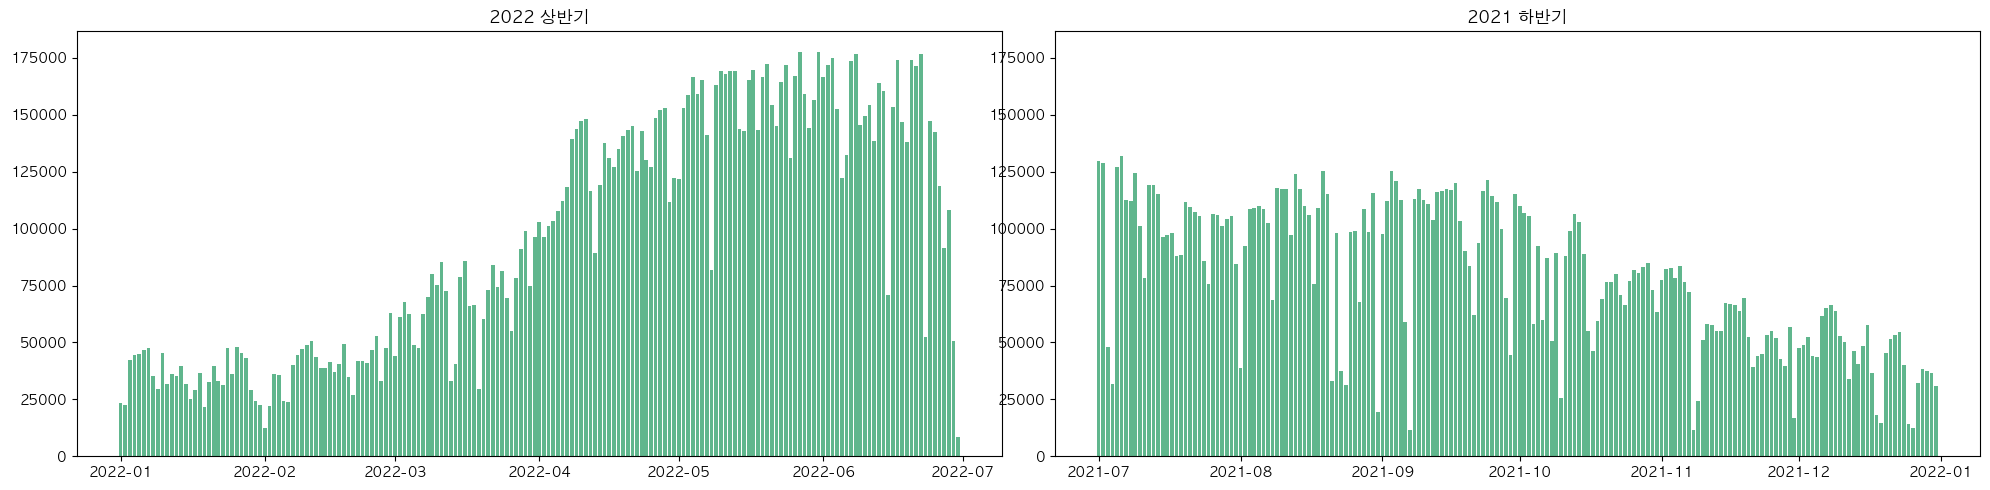

In [366]:
fig, ax = plt.subplots(1, 2, figsize=(20,5),sharey=True)

ax1 = plt.subplot(1,2,1)
firsthalf = eda_plot[eda_plot['datetime']>='2022-01-01']
plt.bar(firsthalf['datetime'],firsthalf['cnt'],color='#60b68d')
plt.title('2022 상반기')

ax2 = plt.subplot(1,2,2,sharey = ax1)    
secondhalf = eda_plot[eda_plot['datetime']<'2022-01-01']
plt.bar(secondhalf['datetime'],secondhalf['cnt'],color='#60b68d')
plt.title('2021 하반기')

plt.subplots_adjust(wspace=0, hspace=0)
plt.tight_layout(h_pad=-1, w_pad=-1)
#plt.bar(eda_plot['datetime'],eda_plot['cnt'],color='#60b68d')

In [360]:
eda_plot[eda_plot['datetime']>='2022-01-01']

year  month  day     cnt   datetime
2    2022      1    1   23392 2022-01-01
7    2022      1    2   22579 2022-01-02
201  2022      1    3   42110 2022-01-03
208  2022      1    4   44634 2022-01-04
26   2022      1    5   45056 2022-01-05
..    ...    ...  ...     ...        ...
147  2022      6   26  118650 2022-06-26
153  2022      6   27   91554 2022-06-27
161  2022      6   28  108059 2022-06-28
358  2022      6   29   50523 2022-06-29
178  2022      6   30    8459 2022-06-30

[181 rows x 5 columns]

In [354]:
eda_plot

year  month  day    cnt   datetime
2    2022      1    1  23392 2022-01-01
7    2022      1    2  22579 2022-01-02
201  2022      1    3  42110 2022-01-03
208  2022      1    4  44634 2022-01-04
26   2022      1    5  45056 2022-01-05
..    ...    ...  ...    ...        ...
155  2021     12   27  32330 2021-12-27
163  2021     12   28  38261 2021-12-28
170  2021     12   29  37493 2021-12-29
360  2021     12   30  36585 2021-12-30
361  2021     12   31  30718 2021-12-31

[365 rows x 5 columns]

# Geographic

In [426]:
#!conda install folium --all -y

In [708]:
import folium
folium.__version__

'0.13.0'

In [709]:
import pandas as pd

# 미리 만들어둔 데이터를 불러옵니다.
commute = pd.read_csv('./eda/commute1000.csv')
commute.head()

rentfromid   latitude   longitude  rentfromname  renttoid  latitude_1  \
0         567  37.544590  127.057083    성수역 2번출구 앞       563   37.547913   
1         589  37.544159  127.056656       성수역3번출구       509   37.539654   
2        1906  37.509720  126.890099  신도림역 1번 출구 앞      4556   37.513748   
3        2744  37.562092  126.820969       강서세무서 앞      2701   37.565201   
4        1977  37.486210  126.838821  천왕역 1번 출입구 앞      3906   37.476048   

   longitude_1     renttoname   cnt  
0   127.062752      성동세무서 건너편  3603  
1   127.052589    이마트 버스정류소 옆  3354  
2   126.888512  리버뷰신안인스빌1차 후문  2760  
3   126.827316  마곡나루역 5번출구 뒤편  2681  
4   126.845016     천왕차량사업소 입구  2594

In [710]:
commute[['rentfromname', 'renttoname','cnt']].head(10)

rentfromname     renttoname   cnt
0     성수역 2번출구 앞      성동세무서 건너편  3603
1        성수역3번출구    이마트 버스정류소 옆  3354
2   신도림역 1번 출구 앞  리버뷰신안인스빌1차 후문  2760
3        강서세무서 앞  마곡나루역 5번출구 뒤편  2681
4   천왕역 1번 출입구 앞     천왕차량사업소 입구  2594
5   여의나루역 1번출구 앞          63스퀘어  2560
6  마곡나루역 5번출구 뒤편  코오롱One&Only타워  2530
7  마곡나루역 5번출구 뒤편     마곡센트럴타워 1차  2350
8   여의나루역 1번출구 앞         국민일보 앞  2346
9      공항초등학교건너편  마곡나루역 5번출구 뒤편  2331

In [711]:
commute = commute.dropna().reset_index()

In [712]:
#https://dailyheumsi.tistory.com/m/144?category=854906

In [713]:
pointfrom = []
pointto = []
path = []
pathlist = []
for i in range(99):
    pointfrom = []
    pointto = []
    path = []
    pointfrom.append(commute.loc[i,'latitude'])
    pointfrom.append(commute.loc[i,'longitude'])
    path.append(pointfrom)
    line = []
    pointto.append(commute.loc[i,'latitude_1'])
    pointto.append(commute.loc[i,'longitude_1'])
    path.append(pointto)
    pathlist.append(path)
#commute[['latitude', 'longitude']],commute[['latitude_1','longitude_1']].tolist()

In [714]:
center = [37.541, 126.986]
m = folium.Map(location=center, zoom_start=12)

In [715]:
# 배경지도 타일 설정하기
layer = "Base"
tileType = "png"
tiles = f"http://api.vworld.kr/req/wmts/1.0.0/04C76258-4B3C-3252-B3AF-F227C8E2E7FE/{layer}/{{z}}/{{y}}/{{x}}.{tileType}"
attr = "Vworld"

folium.TileLayer(
    tiles=tiles,
    attr=attr,
    overlay=True,
    control=True
).add_to(m)

In [716]:
#출발

latitude = 0
longitude = 0
# 1000 개의 데이터만 그려냅니다.
for i in range(99):
    folium.Circle(
        location = commute.loc[i, ['latitude', 'longitude']].tolist(),
        radius = 200,
        color = 'blue'
    ).add_to(m)

In [717]:
#도착
for i in range(99):
    folium.Circle(
        location = commute.loc[i, ['latitude_1', 'longitude_1']].tolist(),
        radius = 200,
        color = 'red'
    ).add_to(m)

In [718]:
folium.PolyLine(
    locations = pathlist,
    tooltip = 'PolyLine',
    color = 'black'
).add_to(m)

m

In [719]:
commute_early = pd.read_csv('./eda/commute_early.csv')
commute_early[['rentfromname','renttoname','cnt']].head(10)

rentfromname     renttoname   cnt
0       공항초등학교건너편  마곡나루역 5번출구 뒤편  1566
1         강서세무서 앞  마곡나루역 5번출구 뒤편  1529
2      송파지역자활센터 뒤   천호역 10번 출구 앞  1171
3     마곡13단지 정문 앞        마곡역1번출구  1071
4    그랜드아이파크아파트 앞       가양역 8번출구  1063
5         자양중앙나들목  뚝섬유원지역 1번출구 앞  1039
6     마곡나루역 3번 출구  코오롱One&Only타워   922
7    천왕역 1번 출입구 앞     천왕차량사업소 입구   911
8  마곡수명산파크3단지 교차로         마곡역교차로   883
9     상일동역 2번출구 앞     한국종합기술사옥 앞   877

# 오후

In [720]:
afternoon = pd.read_csv('./eda/afternoon.csv')
afternoon = afternoon.dropna().reset_index()

In [721]:
pointfrom = []
pointto = []
path = []
pathlist = []
for i in range(len(afternoon)):
    pointfrom = []
    pointto = []
    path = []
    pointfrom.append(afternoon.loc[i,'latitude'])
    pointfrom.append(afternoon.loc[i,'longitude'])
    path.append(pointfrom)
    line = []
    pointto.append(afternoon.loc[i,'latitude_1'])
    pointto.append(afternoon.loc[i,'longitude_1'])
    path.append(pointto)
    pathlist.append(path)
#commute[['latitude', 'longitude']],commute[['latitude_1','longitude_1']].tolist()

In [722]:
center = [37.541, 126.986]
m = folium.Map(location=center, zoom_start=12)

In [723]:
# 배경지도 타일 설정하기
layer = "Base"
tileType = "png"
tiles = f"http://api.vworld.kr/req/wmts/1.0.0/04C76258-4B3C-3252-B3AF-F227C8E2E7FE/{layer}/{{z}}/{{y}}/{{x}}.{tileType}"
attr = "Vworld"

folium.TileLayer(
    tiles=tiles,
    attr=attr,
    overlay=True,
    control=True
).add_to(m)

In [728]:
latitude = 0
longitude = 0

#출발
for i in range(len(afternoon)):
    folium.Circle(
        location = afternoon.loc[i, ['latitude', 'longitude']].tolist(),
        radius = 200,
        color = 'blue'
    ).add_to(m)
    
#도착
for i in range(len(afternoon)):
    folium.Circle(
        location = afternoon.loc[i, ['latitude_1', 'longitude_1']].tolist(),
        radius = 200,
        color = 'red'
    ).add_to(m)
    
#path
folium.PolyLine(
    locations = pathlist,
    tooltip = 'PolyLine',
    color = 'black'
).add_to(m)

m

In [729]:
afternoon[['rentfromname','renttoname','cnt']].head(15)

rentfromname        renttoname    cnt
0      뚝섬유원지역 1번출구 앞     뚝섬유원지역 1번출구 앞  11707
1       여의나루역 1번출구 앞      여의나루역 1번출구 앞  11620
2              월드컵공원             월드컵공원   9540
3          서울숲 관리사무소         서울숲 관리사무소   7728
4         한강공원 망원나들목        한강공원 망원나들목   6482
5        올림픽공원역 3번출구       올림픽공원역 3번출구   5423
6           옥수역 3번출구          옥수역 3번출구   3729
7              당산육갑문             당산육갑문   3627
8            봉림교 교통섬           봉림교 교통섬   3563
9             산업은행 앞            산업은행 앞   3350
10   한신16차아파트 119동 앞   한신16차아파트 119동 앞   3050
11              동방1교           봉림교 교통섬   2952
12            신정교 하부            신정교 하부   2884
13  독산보도육교 앞 자전거 보관소  독산보도육교 앞 자전거 보관소   2874
14          여의도중학교 옆          여의도중학교 옆   2840

# 하천의 특징 때문에 ...

In [778]:
import requests
import json
import pandas as pd
import numpy as np
from pandas.io.json import json_normalize
import os
import webbrowser
import folium
from folium import plugins
print(folium.__version__)

0.13.0


In [771]:
river = pd.read_csv('./eda/river.csv')
river = river.dropna().reset_index()
river = river[river['cnt']>=1000] #1년에 1건까지 들어갔더니 너무 많아서 제한

In [772]:
pointfrom = []
pointto = []
path = []
pathlist = []
for i in range(len(river)):
    pointfrom = []
    pointto = []
    path = []
    pointfrom.append(river.loc[i,'latitude'])
    pointfrom.append(river.loc[i,'longitude'])
    path.append(pointfrom)
    line = []
    pointto.append(river.loc[i,'latitude_1'])
    pointto.append(river.loc[i,'longitude_1'])
    path.append(pointto)
    pathlist.append(path)
#commute[['latitude', 'longitude']],commute[['latitude_1','longitude_1']].tolist()

In [797]:
center = [37.541, 126.986]
m = folium.Map(location=center, zoom_start=12)

# 배경지도 타일 설정하기
layer = "Base"
tileType = "png"
tiles = f"http://api.vworld.kr/req/wmts/1.0.0/04C76258-4B3C-3252-B3AF-F227C8E2E7FE/{layer}/{{z}}/{{y}}/{{x}}.{tileType}"
attr = "Vworld"

folium.TileLayer(
    tiles=tiles,
    attr=attr,
    overlay=True,
    control=True
).add_to(m)

# json파일 로딩
import json
geo_path = './eda/05. skorea_municipalities_geo_simple.json'
geo_str = json.load(open(geo_path, encoding='utf-8'))

#m = folium.Map(location=[37.5502, 126.982], zoom_start=12)

folium.Choropleth(
    geo_data=geo_str,
    name="choropleth",
    fill_color="gray",
    fill_opacity=0.2,
    line_opacity=.1,
).add_to(m)

folium.LayerControl().add_to(m)


#출발
for i in range(len(river)):
    folium.Circle(
        location = river.loc[i, ['latitude', 'longitude']].tolist(),
        radius = 100,
        color = 'royalblue'
    ).add_to(m)
    
#도착
for i in range(len(river)):
    folium.Circle(
        location = river.loc[i, ['latitude_1', 'longitude_1']].tolist(),
        radius = 100,
        color = 'royalblue'
    ).add_to(m)
    
#path
folium.PolyLine(
    locations = pathlist,
    tooltip = 'PolyLine',
    color = 'royalblue'
).add_to(m)

m

# 공휴일

In [809]:
# SQL을 사용하여 프로젝트에서 데이터를 조회 후 pandas dataframe에 입력

sql = 'select year, month, day, count(*) as cnt from bkms-project-3.data.bike where year = 2021 and month = 9 and day between 1 and 30 group by year, month, day order by 1,2,3'
project_id = "bkms-project-3"

holiday = pd.read_gbq(sql, project_id=project_id, dialect='standard')
holiday

year  month  day     cnt
0   2021      9    1   97808
1   2021      9    2  112296
2   2021      9    3  125266
3   2021      9    4  121063
4   2021      9    5  112618
5   2021      9    6   59048
6   2021      9    7   11325
7   2021      9    8  113132
8   2021      9    9  117409
9   2021      9   10  112479
10  2021      9   11  110631
11  2021      9   12  103822
12  2021      9   13  116000
13  2021      9   14  116408
14  2021      9   15  117465
15  2021      9   16  117032
16  2021      9   17  120157
17  2021      9   18  103385
18  2021      9   19   90234
19  2021      9   20   83786
20  2021      9   21   62022
21  2021      9   22   93749
22  2021      9   23  116669
23  2021      9   24  121299
24  2021      9   25  114447
25  2021      9   26  111798
26  2021      9   27   99928
27  2021      9   28   69339
28  2021      9   29   44626
29  2021      9   30  115220

In [810]:
holiday['datetime'] = pd.to_datetime(holiday[['year', 'month', 'day']]) #datetime하려면 컬럼이름이 year,month,day,hour여야함.

Text(0.5, 1.0, '2021-09 DDAREUNGI Use')

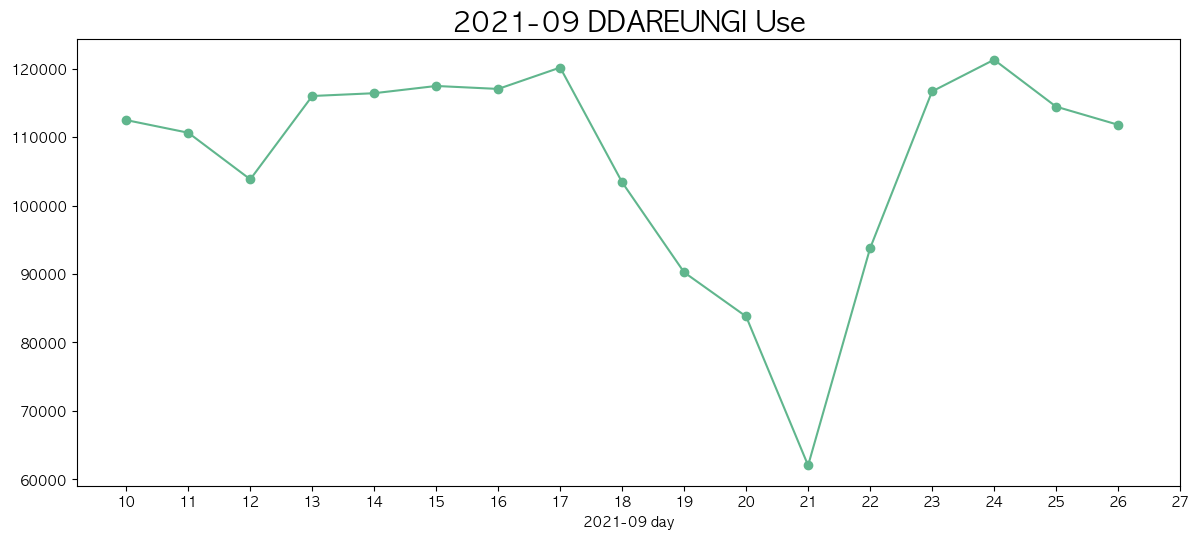

In [833]:
plt.figure(figsize=(12,5))
holiday = holiday[holiday['day']>=10]
holiday = holiday[holiday['day']<27]
plt.scatter(holiday['day'],holiday['cnt'],color='#60b68d')
plt.plot(holiday['day'],holiday['cnt'],color='#60b68d')
#plt.bar(holiday['datetime'],holiday['cnt'],color='#60b68d')

plt.subplots_adjust(wspace=0, hspace=0)
plt.tight_layout(h_pad=-1, w_pad=-1)

plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.xlabel('2021-09 day', fontsize=10)
plt.xticks([10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27], labels = [10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27])
plt.title('2021-09 DDAREUNGI Use',fontsize=20)

공휴일 깃허브 참고해서 다시해보기(좋아보이는거 따라하기)     
https://github.com/syedsharin/Seoul-Bike-Sharing-Demand-Prediction/blob/main/Bike_Sharing_Demand_Prediction_Capstone_Project.ipynb

In [834]:
# SQL을 사용하여 프로젝트에서 데이터를 조회 후 pandas dataframe에 입력

sql = 'select holyday, hour, count(*) as cnt from bkms-project-3.data.bike group by holyday, hour order by 2'
project_id = "bkms-project-3"

holiday = pd.read_gbq(sql, project_id=project_id, dialect='standard')
holiday

GenericGBQException: Reason: 400 Unrecognized name: holyday at [1:8]

Location: US
Job ID: 0cb3c124-4f6c-4720-a43d-117d12ae1f0e


# 대여소 분포

In [936]:
# SQL을 사용하여 프로젝트에서 데이터를 조회 후 pandas dataframe에 입력

sql = 'select * from bkms-project-3.data.allstation'
project_id = "bkms-project-3"

allstation = pd.read_gbq(sql, project_id=project_id, dialect='standard')
allstation

rentid     rentname region   latitude   longitude  holdernum  \
0        107   신한은행 서교동지점    마포구  37.557510  126.918503          5   
1        108      서교동 사거리    마포구  37.552746  126.918617         10   
2        116   일진아이윌아파트 옆   서대문구  37.564541  126.927071          5   
3        139   연세대 정문 건너편   서대문구  37.559864  126.934418         10   
4        141    연대 대운동장 옆   서대문구  37.562382  126.932648         10   
...      ...          ...    ...        ...         ...        ...   
2648     397  종묘공영주차장 건너편    종로구  37.570480  126.996635         13   
2649     433  을지로입구역 2번출구     중구  37.566345  126.982292         12   
2650     467         한국은행     중구  37.562214  126.980865         11   
2651    4760     서울역 7번출구     중구  37.556644  126.973640         10   
2652    4774  을지로입구역 8번출구     중구  37.565903  126.981781          9   

         emplace system  river  nearsub  
0     2021.12.28     QR      0        0  
1     2021.12.28     QR      0        0  
2       2015.9.7     QR      0        0  
3       2015.9.7     QR      0        0  
4       2015.9.7     QR      0        0  
...          ...    ...    ...      ...  
2648   2018.4.30    LCD      1        3  
2649  2018.12.14    LCD      1        3  
2650   2020.1.31     QR      1        3  
2651  2020.10.26     QR      1        3  
2652   2020.9.23     QR      1        3  

[2653 rows x 10 columns]

In [937]:
allstation = allstation.dropna().reset_index()

In [938]:
allstation['region'].unique()

array(['마포구', '서대문구', '동작구', '영등포구', '종로구', '중구', '성동구', '광진구', '동대문구',
       '양천구', '용산구', '은평구', '강동구', '강서구', '송파구', '성북구', '중랑구', '강북구',
       '노원구', '도봉구', '금천구', '구로구', '관악구', '서초구', '강남구'], dtype=object)

In [943]:
import random

center = [37.541, 126.986]
m = folium.Map(location=center, zoom_start=12)

# 배경지도 타일 설정하기
layer = "gray"
tileType = "png"
tiles = f"http://api.vworld.kr/req/wmts/1.0.0/04C76258-4B3C-3252-B3AF-F227C8E2E7FE/{layer}/{{z}}/{{y}}/{{x}}.{tileType}"
attr = "Vworld"

folium.TileLayer(
    tiles=tiles,
    attr=attr,
    overlay=True,
    control=True
).add_to(m)

for gu in range(len(allstation['region'].unique())):
    one = allstation[allstation['region']==allstation['region'].unique()[gu]]
    one = one.reset_index()
    hexadecimal = ["#"+''.join([random.choice('ABCDEF0123456789') for i in range(6)])]
    for i in range(len(one)):
        folium.Circle(
            location = one.loc[i, ['latitude', 'longitude']].tolist(),
            radius = 100,
            color = color_palette[gu]
        ).add_to(m)
    
m

In [942]:
color_palette = ['#be254a', '#dc484c', '#ef6645', '#f88c51', '#fdb365', 
                 '#fed27f', '#feeb9d', '#fffebe', '#f0f9a7', '#d8ef9b', 
                 '#b3e0a2', '#89d0a4', '#60bba8', '#3f97b7', '#4273b3',
                 '#be254a', '#dc484c', '#ef6645', '#f88c51', '#fdb365',
                '#8F8E21', '#FFFE6E', '#DBDA48', '#592B8F', '#9253DB']

In [702]:
color_palette = ['#228F25', '#70FF74', '#4BDB4F', '#8F2C58', '#DB4B8C', 
                 '#8F8E21', '#FFFE6E', '#DBDA48', '#592B8F', '#9253DB', 
                 '#8F5E21', '#FFBE6E', '#60bba8', '#2B6D8F', '#51ACDB',
                 '#be254a', '#dc484c', '#ef6645', '#f88c51', '#DB1F0C',
                '#be254a', '#dc484c', '#ef6645', '#f88c51', '#fdb365']

In [698]:
color_palette = ['#4AD95F', '#DBD75A', '#4BDB4F', '#8F2C58', '#DB4B8C', 
                 '#758AD9', '#86DBCA', '#DBDA48', '#592B8F', '#9253DB', 
                 '#D94A6B', '#DBD870', '#60bba8', '#2B6D8F', '#51ACDB',
                 '#D9B655', '#8E5ADB', '#ef6645', '#f88c51', '#DB1F0C',
                '#5FD972', '#DB8465', '#DB4484', '#4F7ADB', '#fdb365']

In [704]:
color_palette = ['red', 'orange', 'yellow', 'green', 'blue', 
                 'powderblue', 'purple', 'gray', 'hotpink', 'darkgreen', 
                 'lightcoral', 'chocolate', 'darkgray', 'darkblue', 'cornflowerblue',
                 'gold', 'darkolivegreen', 'lawngreen', 'bisque', 'rosybrown',
                'steelblue', 'crimson', 'deeppink', 'fuchsia', 'violet']